# Inspecting building's dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
from pyaxis import pyaxis

In [2]:
px_data = pyaxis.parse("../../data/raw_data/buildings_data.px", encoding="utf-8")
df = pd.DataFrame(px_data["DATA"])
df.columns
df.columns = ["territory", "building_cat", "build_period", "year", "quantity"]
df["quantity"] = pd.to_numeric(df["quantity"])

In [3]:
df.head()

,territory,building_cat,build_period,year,quantity
0,Schweiz,Einfamilienhäuser,Vor 1919,2010,133198
1,Schweiz,Einfamilienhäuser,Vor 1919,2011,125763
2,Schweiz,Einfamilienhäuser,Vor 1919,2012,126508
3,Schweiz,Einfamilienhäuser,Vor 1919,2013,126055
4,Schweiz,Einfamilienhäuser,Vor 1919,2014,126037


In [4]:
territory_df = df.groupby(["territory", "build_period"])["quantity"].sum().reset_index()

In [5]:
territory_df[territory_df.territory.str.contains(r"\b5627\b", case=False, na=False)]

,territory,build_period,quantity
20892,......5627 Chavannes-près-Renens,1919-1945,762
20893,......5627 Chavannes-près-Renens,1946-1960,354
20894,......5627 Chavannes-près-Renens,1961-1970,446
20895,......5627 Chavannes-près-Renens,1971-1980,561
20896,......5627 Chavannes-près-Renens,1981-1990,387
20897,......5627 Chavannes-près-Renens,1991-2000,196
20898,......5627 Chavannes-près-Renens,2001-2005,224
20899,......5627 Chavannes-près-Renens,2006-2010,230
20900,......5627 Chavannes-près-Renens,2011-2015,82
20901,......5627 Chavannes-près-Renens,2016-2020,110


In [ ]:
territory_df["MunicipalityNumber"]=0
for i in range(9000):
    ID = str(i)
    territory_df.loc[territory_df.territory.str.contains(ID, case=False, na=False),"MunicipalityNumber"] = i


In [18]:
territory_df.head()

,territory,build_period,quantity,MunicipalityNumber
0,- Aargau,1919-1945,215308,0
1,- Aargau,1946-1960,231370,0
2,- Aargau,1961-1970,196599,0
3,- Aargau,1971-1980,245402,0
4,- Aargau,1981-1990,286534,0


In [21]:
territory_final_df= territory_df.drop(territory_df[territory_df.MunicipalityNumber==0].index)
territory_final_df.head(15)

,territory,build_period,quantity,MunicipalityNumber
312,......0001 Aeugst am Albis,1919-1945,96,1
313,......0001 Aeugst am Albis,1946-1960,288,1
314,......0001 Aeugst am Albis,1961-1970,428,1
315,......0001 Aeugst am Albis,1971-1980,987,1
316,......0001 Aeugst am Albis,1981-1990,1140,1
317,......0001 Aeugst am Albis,1991-2000,1511,1
318,......0001 Aeugst am Albis,2001-2005,576,1
319,......0001 Aeugst am Albis,2006-2010,687,1
320,......0001 Aeugst am Albis,2011-2015,153,1
321,......0001 Aeugst am Albis,2016-2020,146,1


In [32]:
territory_final_df["building_category"] = ""

# Create the mask old
mask_old = (
    (territory_final_df.build_period == "Vor 1919") |
    (territory_final_df.build_period == "1919-1945") |
    (territory_final_df.build_period == "1946-1960") |
    (territory_final_df.build_period == "1961-1970")
)
# Create the mask medium
mask_medium = (
    (territory_final_df.build_period == "1971-1980") |
    (territory_final_df.build_period == "1981-1990") |
    (territory_final_df.build_period == "1991-2000") |
    (territory_final_df.build_period == "2001-2005")
)
# Create the mask new
mask_new = (
    (territory_final_df.build_period == "2006-2010") |
    (territory_final_df.build_period == "2011-2015") |
    (territory_final_df.build_period == "2016-2020") |
    (territory_final_df.build_period == "2021-2023")
)


territory_final_df.loc[mask_old,"building_category"] = "old"
territory_final_df.loc[mask_medium,"building_category"] = "medium"
territory_final_df.loc[mask_new,"building_category"] = "new"
territory_final_df

,territory,build_period,quantity,MunicipalityNumber,building_category
312,......0001 Aeugst am Albis,1919-1945,96,1,old
313,......0001 Aeugst am Albis,1946-1960,288,1,old
314,......0001 Aeugst am Albis,1961-1970,428,1,old
315,......0001 Aeugst am Albis,1971-1980,987,1,medium
316,......0001 Aeugst am Albis,1981-1990,1140,1,medium
...,...,...,...,...,...
25939,......6811 Damphreux-Lugnez,2006-2010,69,6811,new
25940,......6811 Damphreux-Lugnez,2011-2015,34,6811,new
25941,......6811 Damphreux-Lugnez,2016-2020,46,6811,new
25942,......6811 Damphreux-Lugnez,2021-2023,1,6811,new


In [42]:
building_ages = territory_final_df.groupby(["MunicipalityNumber", "building_category"])["quantity"].agg(["sum"])
building_ages.reset_index(inplace=True)

In [65]:
building_ages.head()

,MunicipalityNumber,building_category,sum
0,1,medium,4214
1,1,new,998
2,1,old,2414
3,2,medium,13437
4,2,new,2145


In [51]:
medium_age_df = building_ages[building_ages.building_category == "medium"]
medium_age_df["building_medium"] = medium_age_df["building_category"]
medium_age_df["building_medium_age"] = medium_age_df["sum"]
medium_age_df.drop(["building_category","sum", "building_medium"], axis=1, inplace=True)
medium_age_df

C:\Users\godenzi\AppData\Local\Temp\ipykernel_16240\573153723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_age_df["building_medium"] = medium_age_df["building_category"]
C:\Users\godenzi\AppData\Local\Temp\ipykernel_16240\573153723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_age_df["building_medium_age"] = medium_age_df["sum"]
C:\Users\godenzi\AppData\Local\Temp\ipykernel_16240\573153723.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,MunicipalityNumber,building_medium_age
0,1,4214
3,2,13437
6,3,10038
9,4,7134
12,5,5530
...,...,...
6393,6807,1849
6396,6808,1789
6399,6809,2221
6402,6810,1983


In [ ]:
old_age_df = building_ages[building_ages.building_category == "old"]
old_age_df["building_old_age"] = old_age_df["sum"]
old_age_df.drop(["building_category","sum"], axis=1, inplace=True)
old_age_df

C:\Users\godenzi\AppData\Local\Temp\ipykernel_16240\1313727249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_age_df["building_old_age"] = old_age_df["sum"]
C:\Users\godenzi\AppData\Local\Temp\ipykernel_16240\1313727249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_age_df.drop(["building_category","sum"], axis=1, inplace=True)


,MunicipalityNumber,building_old_age
2,1,2414
5,2,11173
8,3,3904
11,4,6261
14,5,5243
...,...,...
6395,6807,5534
6398,6808,7064
6401,6809,5161
6404,6810,5273


In [58]:
new_age_df = building_ages[building_ages.building_category == "new"]
new_age_df["building_new_age"] = new_age_df["sum"]
new_age_df.drop(["building_category","sum"], axis=1, inplace=True)
new_age_df

C:\Users\godenzi\AppData\Local\Temp\ipykernel_16240\2425964326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_age_df["building_new_age"] = new_age_df["sum"]
C:\Users\godenzi\AppData\Local\Temp\ipykernel_16240\2425964326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_age_df.drop(["building_category","sum"], axis=1, inplace=True)


,MunicipalityNumber,building_new_age
1,1,998
4,2,2145
7,3,1404
10,4,1325
13,5,1219
...,...,...
6394,6807,327
6397,6808,396
6400,6809,351
6403,6810,364


In [61]:
final_age_df = pd.merge(new_age_df, medium_age_df, on="MunicipalityNumber")
final_age_df = pd.merge(final_age_df, old_age_df, on="MunicipalityNumber")
final_age_df.isna().sum()

MunicipalityNumber     0
building_new_age       0
building_medium_age    0
building_old_age       0
dtype: int64

# Further independent analysis

In [64]:
final_age_df["MunicipalityNumber"].unique()

array([   1,    2,    3, ..., 6809, 6810, 6811], dtype=int64)

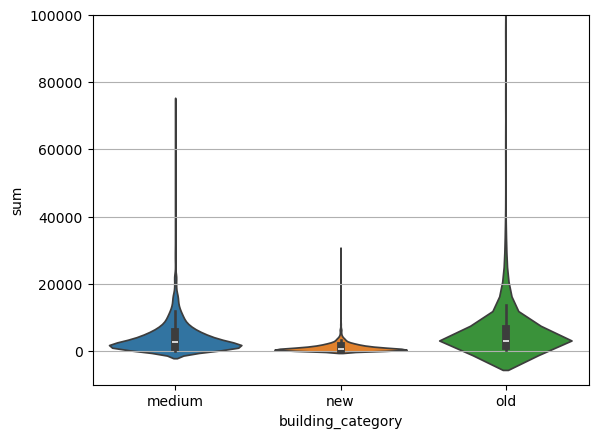

In [80]:

sns.violinplot(data=building_ages, x="building_category", y="sum", hue="building_category")
plt.ylim([-10000,100000])
plt.grid(axis="y")

In [83]:
pronovo_df = pd.read_csv("../../data/cleaned_data/Swiss_solar_potential.csv")
pronovo_df

,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,fpv_pot_reco,roof_area,facade_area,total_power,total_energy,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month08_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id
0,Sévaz,FR,4.670673e+06,4.180890e+06,1.929158e+06,1.425327e+06,39036.054397,33832.332298,3693.98,3693980.0,...,1.72,1.35,0.87,0.50,0.35,13.55,0.86,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2043
1,Onnens (VD),VD,1.305776e+07,1.177943e+07,3.235058e+06,2.103798e+06,112876.590943,63996.552432,8615.12,8615120.0,...,2.12,1.67,1.02,0.57,0.42,15.85,1.54,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5565
2,Cressier (NE),NE,1.679586e+07,1.422929e+07,7.305761e+06,4.541674e+06,146427.208998,153540.786324,9229.40,9229400.0,...,3.73,2.97,1.86,1.04,0.79,26.41,4.48,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6452
3,Clarmont,VD,1.777467e+06,1.489369e+06,9.465443e+05,6.455402e+05,13871.650234,16173.060807,986.84,986840.0,...,0.38,0.32,0.21,0.12,0.10,2.79,0.46,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5629
4,Giornico,TI,1.495146e+07,5.614214e+06,5.010771e+06,2.016368e+06,150042.723782,137640.972544,3393.20,3393200.0,...,1.21,0.99,0.66,0.36,0.28,8.37,1.72,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5073


In [102]:
merged_df = pd.merge(final_age_df, pronovo_df, left_on="MunicipalityNumber", right_on="mun_id")

In [103]:
merged_df

,MunicipalityNumber,building_new_age,building_medium_age,building_old_age,MunicipalityName,mun_name,canton_abr,pv_pot,pv_pot_reco,fpv_pot,...,Scenario3_RoofsFacades_PotentialSolarElectricity_Month08_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh,Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh,Scenario4_RoofsFacades_PotentialSolarElectricity_GWh,Scenario4_RoofsFacades_PotentialSolarHeat_GWh,Factsheet,Methodology,mun_id
0,1,998,4214,2414,Aeugst am Albis,Aeugst am Albis,ZH,1.910714e+07,1.348543e+07,8.666142e+06,...,2.62,2.04,1.33,0.72,0.61,15.42,5.02,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,1
1,2,2145,13437,11173,Affoltern am Albis,Affoltern am Albis,ZH,6.727411e+07,5.286801e+07,3.796268e+07,...,11.56,8.71,5.48,2.75,2.22,70.33,20.53,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,2
2,3,1404,10038,3904,Bonstetten,Bonstetten,ZH,2.807809e+07,2.086292e+07,1.442854e+07,...,4.13,3.16,2.00,1.03,0.82,22.68,9.07,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,3
3,4,1325,7134,6261,Hausen am Albis,Hausen am Albis,ZH,3.620122e+07,2.583782e+07,1.747077e+07,...,4.86,3.79,2.48,1.38,1.18,29.61,8.82,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,4
4,5,1219,5530,5243,Hedingen,Hedingen,ZH,2.659854e+07,1.953973e+07,1.247946e+07,...,3.86,2.95,1.88,0.97,0.79,22.08,7.41,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,6807,327,1849,5534,NaN,Basse-Allaine,JU,1.756816e+07,1.326962e+07,8.154022e+06,...,3.55,2.82,1.95,1.03,0.79,23.94,4.16,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6807
2126,6808,396,1789,7064,NaN,Clos du Doubs,JU,2.202651e+07,1.540188e+07,9.230486e+06,...,3.82,3.08,2.26,1.21,0.89,26.06,5.47,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6808
2127,6809,351,2221,5161,NaN,Haute-Ajoie,JU,2.244028e+07,1.720105e+07,8.837971e+06,...,4.65,3.72,2.63,1.46,1.12,33.54,5.01,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6809
2128,6810,364,1983,5273,NaN,La Baroche,JU,1.956048e+07,1.420631e+07,8.351648e+06,...,3.85,3.08,2.22,1.19,0.91,26.52,4.79,https://www.uvek-gis.admin.ch/BFE/storymaps/EC...,https://www.uvek-gis.admin.ch/BFE/redirect/sol...,6810


In [106]:
buildings_2024_df = merged_df[["MunicipalityNumber", "building_new_age", "building_medium_age",	"building_old_age",	"mun_name"]]

In [108]:
buildings_2024_df["MunicipalityName"] = buildings_2024_df["mun_name"]
buildings_2024_df.drop("mun_name", axis=1, inplace=True)

C:\Users\godenzi\AppData\Local\Temp\ipykernel_16240\1212473084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings_2024_df["MunicipalityName"] = buildings_2024_df["mun_name"]
C:\Users\godenzi\AppData\Local\Temp\ipykernel_16240\1212473084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buildings_2024_df.drop("mun_name", axis=1, inplace=True)


In [109]:
buildings_2024_df

,MunicipalityNumber,building_new_age,building_medium_age,building_old_age,MunicipalityName
0,1,998,4214,2414,Aeugst am Albis
1,2,2145,13437,11173,Affoltern am Albis
2,3,1404,10038,3904,Bonstetten
3,4,1325,7134,6261,Hausen am Albis
4,5,1219,5530,5243,Hedingen
...,...,...,...,...,...
2125,6807,327,1849,5534,Basse-Allaine
2126,6808,396,1789,7064,Clos du Doubs
2127,6809,351,2221,5161,Haute-Ajoie
2128,6810,364,1983,5273,La Baroche


## Saving df

In [111]:
buildings_2024_df.to_csv("../../data/raw_data/buildings_2024.csv", index=False)